# Kaggle 기본 예제

- 타아타닉 탑승자 데이터를 기반으로 생존자 예측하는 모델 생성


In [77]:
# 모듈
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **[데이터로딩]**

In [78]:
titanic_df = pd.read_csv('./titanic_train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## **[데이터 확인 및 전처리]**

In [79]:
# 기본 요약 정보
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [80]:
# 머신러닝 모델은 Null을 허용하지 않으므로 결측치 처리 수행 - 대체값
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)

titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [81]:
# Cabin 컬럼의 분포 확인
titanic_df['Cabin'].value_counts()

Cabin
N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 148, dtype: int64

In [82]:
# Cabin Category를 크게 정리
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]

titanic_df['Cabin'].value_counts()

Cabin
N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64

### **[모델의 예측 수행 전 데이터 탐색]**

- 어떤 유형의 승객이 생존확률이 더 높았을지 확인 (가설)

  1. 여성 또는 노약자 먼저 구한다.
  2. 부자 또는 유명인
  3. 삼등실 승객들


In [83]:
# 성별에 따른 생존 결과 확인
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

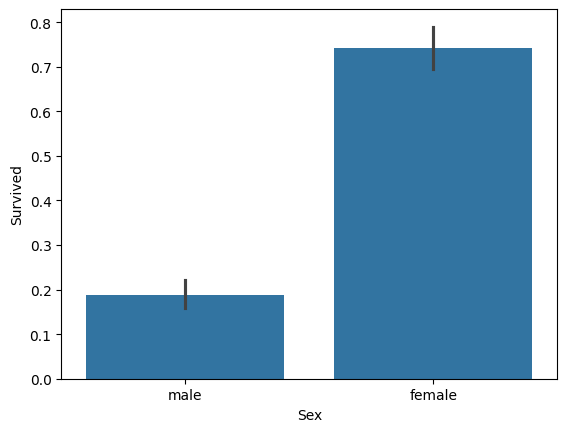

In [84]:
# 더 명확하게 확인하고 싶으면 시각화를 통해서 체크
sns.barplot(x='Sex', y='Survived', data=titanic_df)
plt.show()

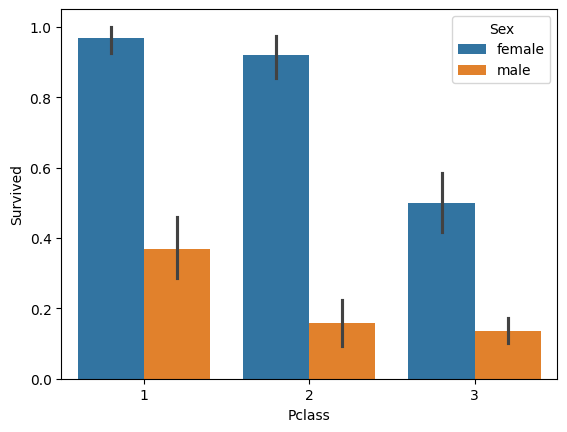

In [85]:
# 부자 또는 유명인의 생존 결과 확인
sns.barplot(x='Pclass', y='Survived', hue= 'Sex' ,data=titanic_df)
plt.show()

In [86]:
# 1) 1가설 중 노약자에 대한 확인이 필요
#   Age 컬럼은 연속된 숫자값 형태 (continuous) -> 범위별로 구별되도록 처리

def get_category(age):
    category = ''
    if age <= -1: category = 'Unknown'
    elif age <= 5 : category = 'Baby'
    elif age <= 12 : category = 'Child'
    elif age <= 18 : category = 'Teenager'
    elif age <= 25 : category = 'Student'
    elif age <= 35 : category = 'Young Adult'
    elif age <= 60 : category = 'Adult'
    else : category = 'Elderly'

    return category


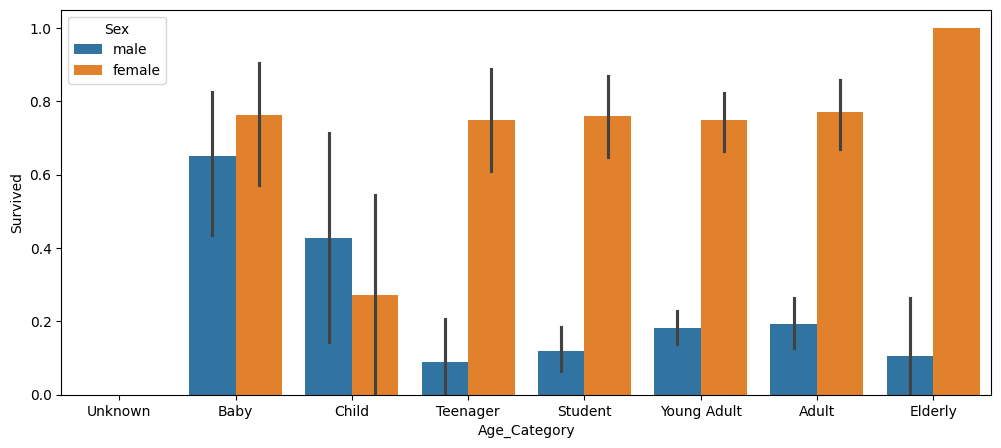

In [87]:
category_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

titanic_df['Age_Category'] = titanic_df['Age'].apply(lambda x : get_category(x))

plt.figure(figsize=(12, 5))

sns.barplot(x='Age_Category', y='Survived', hue='Sex', data=titanic_df, order=category_names)
plt.show()

In [88]:
titanic_df.drop('Age_Category', axis=1, inplace=True)

titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### **[레이블 인코딩]**

In [89]:
from sklearn.preprocessing import LabelEncoder

def encode_features(data):
    features = ['Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        data[feature] = le.fit_transform(data[feature])
    return data

In [90]:
titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,N,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,N,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,N,3


### **[머신러닝 전처리 작업을 한 번에 수행할 수 있도록 처리]**

In [91]:
# 결측치 처리 함수
def fillna_nan(df):
  df['Age'].fillna(df['Age'].mean(), inplace=True)
  df['Cabin'].fillna('N', inplace=True)
  df['Embarked'].fillna('N', inplace=True)
  return df


# 레이블 인코딩
def label_encoding_features(df):
    features = ['Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        df[feature] = le.fit_transform(df[feature])
    return df


# 모델에서 불필요한 특성(feature) 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
    return df


# 최종적으로 전처리를 수행할 함수
def transform_features(df):
    df = fillna_nan(df)
    df = drop_features(df)
    df = label_encoding_features(df)
    return df

# [유의] 최종 전처리 함수 내부에서 수행될 개별 함수의 순서는 신경쓰기


In [92]:
# 데이터 로딩
titanic_df = pd.read_csv('./titanic_train.csv')

# target(label) 데이터
y_titanic_df = titanic_df['Survived']

# feature 데이터
X_titanic_df = titanic_df.drop('Survived', axis=1)

# 데이터 전처리
X_titanic_df = transform_features(titanic_df)


X_titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,3
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,3
3,1,1,0,35.0,1,0,53.1000,3
4,0,3,1,35.0,0,0,8.0500,3


In [93]:
X_titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


## **[모델 생성, 학습, 평가]**

In [97]:
# 학습 세트, 테스트 세트 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

In [98]:
# 예측 시 자주 사용하는 알고리즘 3가지로 각각 예측하고 평가
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 각각 모델 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_crf = LogisticRegression(solver='liblinear')

In [99]:
# 각각 모델 학습 및 예측한 결과를 평가
dt_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
lr_crf.fit(X_train, y_train)

dt_pred = dt_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
lr_pred = lr_crf.predict(X_test)

print('DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('RandomForestClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('LogisticRegression 정확도 : {0:.4f}'.format(accuracy_score(y_test, lr_pred)))


DecisionTreeClassifier 정확도 : 1.0000
RandomForestClassifier 정확도 : 1.0000
LogisticRegression 정확도 : 1.0000
